# Logistic Gradiant Descend
Logistic regression is a classification model performs very well on linearly separable classes but also can be extended to multi-class classification.

### Regular Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Plot setting
plt.style.use('bmh')
plt.rcParams["font.size"] = "20"

### Data Load & Exploration

In [15]:
from sklearn import datasets

In [16]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Coass labels: ', np.unique(y))

Coass labels:  [0 1 2]


### Preprocession

In [18]:
print("Feature Matrix : \n", X[:3])
print("Target Column Vector : \n", y[:3])

Feature Matrix : 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
Target Column Vector : 
 [0 0 0]


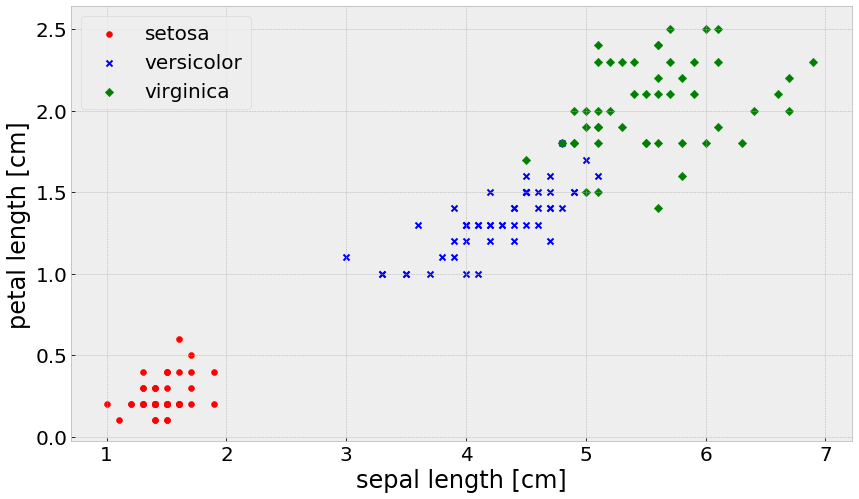

In [19]:
plt.figure(figsize=(14,8))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.scatter(X[100:, 0], X[100:, 1], color='green', marker='D', label = 'virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [32]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [33]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

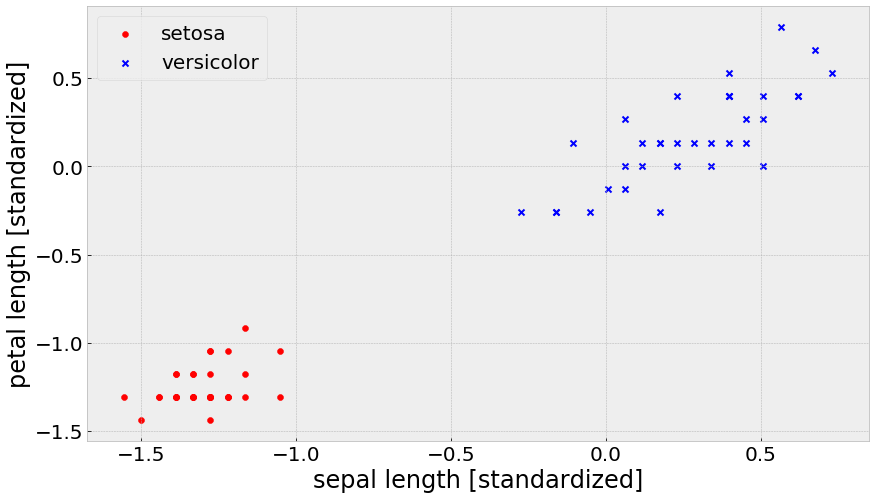

In [38]:
plt.figure(figsize=(14,8))
plt.scatter(X_train_01_subset[(y_train_01_subset == 0)][:, 0], X_train_01_subset[(y_train_01_subset == 0)][:, 1], color='red', marker='o', label = 'setosa')
plt.scatter(X_train_01_subset[(y_train_01_subset == 1)][:, 0], X_train_01_subset[(y_train_01_subset == 1)][:, 1], color='blue', marker='x', label = 'versicolor')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

### Training A Model

In [43]:
from neuralbase import LogisticRegressionGD

In [44]:
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

### Evaluating The Model

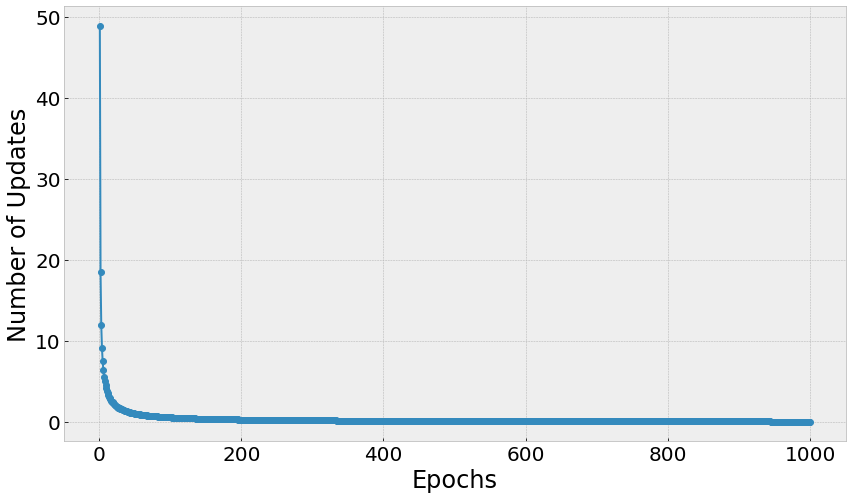

In [45]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, len(lrgd.cost_) + 1), lrgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.show()

### Checking The Disission Boundry

In [46]:
from neuralbase import plot_decision_regions

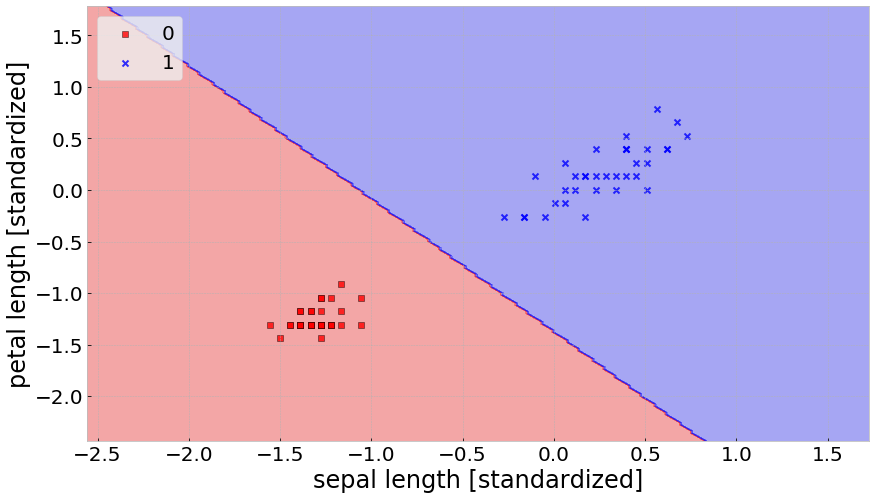

In [47]:
plt.figure(figsize=(14, 8))
plot_decision_regions(X_train_01_subset, y_train_01_subset, classifier=lrgd)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

*Note: Result Shows the Logistic Gradiand Descend Applcation was able to seperate the binary region successfully*

### Logistic Regression with Scikit-Learn

In [48]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs')
lr.fit(X_train_std, y_train)

/home/datapsycho/PycharmProjects/StatBase/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [52]:
from neuralbase import plot_decision_regions_combined

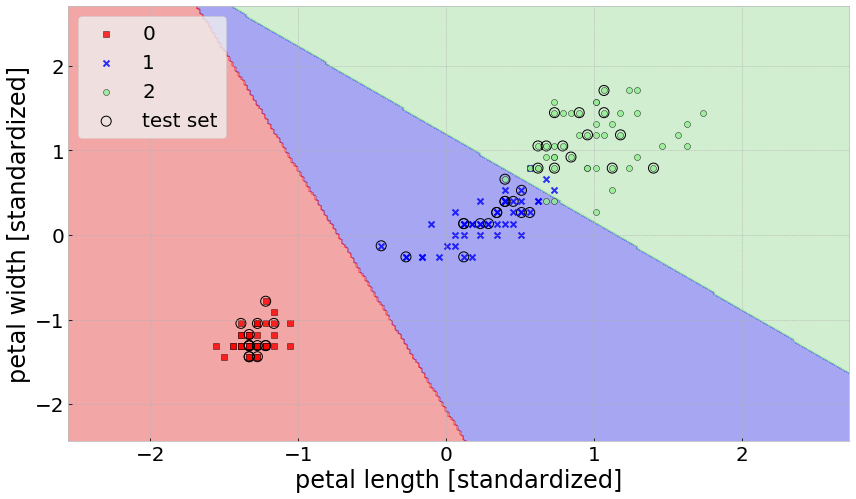

In [55]:
plt.figure(figsize=(14, 8))
plot_decision_regions_combined(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [56]:
# predict the probability
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [58]:
# get the maximum probability for each sample 
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [60]:
# class labels
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [61]:
# single sample prediction by converting a one dimentional array to 2 dimentional array
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### Referances

[1] [Python Machine Learning](https://sebastianraschka.com/books.html)